# Data Mining Techniques

### Names: Eli Kaustinen and Gabriel Marcelino

## Problem Statement
The objective of this assignment is to learn how to apply data mining algorithms in a Python programming environment. Specifically, the report covers:

- An explanation of three key data mining techniques: clustering, association, and correlation analysis.
- A demonstration of each technique using a real-life dataset.
- The development of two models on datasets from the UCI Machine Learning Repository (each having at least 10 attributes and 10,000 instances). One model uses K-Means clustering and the other uses association rule mining.

Each model includes steps for loading packages, pre-processing data, building the model, running predictions, and visualizing results. Additionally, the report explains the purpose of each step and provides an interpretation of the results.


## Data Mining Techniques Overview
### Clustering
#### How It Works:
Clustering is an unsupervised learning method that groups similar data points into clusters. A popular algorithm is K-Means, which:

- Randomly initializes k centroids.
- Assigns each data point to its nearest centroid.
- Recomputes centroids as the mean of the points in each cluster.
- Iterates until the centroids no longer change significantly.

#### Strengths:
- Scalable to large datasets.
- Simple to understand and implement.

#### Weaknesses:
- Requires the number of clusters k to be specified in advance.
- Sensitive to the initial placement of centroids.
- Assumes clusters are spherical and of similar size.

#### Real-life Example:
Segmenting customers based on purchasing behavior in retail.

### Association
#### How It Works:
Association rule mining discovers interesting relationships or co-occurrences among items in large datasets. The Apriori algorithm is a common approach:

- It identifies frequent itemsets that meet a specified support threshold.
- It then generates rules from these itemsets that satisfy confidence and lift criteria.

#### Strengths:
- Helps uncover hidden patterns between items.
- Useful in market basket analysis to optimize product placements.

#### Weaknesses:
- Computationally expensive with a large number of items.
- Can produce a very large number of rules, making interpretation difficult.

#### Real-life Example:
Determining products that are frequently bought together in a supermarket (e.g., bread and butter).

### Correlation Analysis
#### How It Works:
Correlation analysis quantifies the relationship between two continuous variables. Two common measures are:

- Pearson’s correlation coefficient: Measures linear relationships.
- Spearman’s rank correlation coefficient: Measures monotonic relationships even if they are not linear.

#### Strengths:
- Quick to compute and interpret.
- Provides a numerical value indicating the strength and direction of a relationship.

#### Weaknesses:
- Pearson’s correlation only captures linear relationships.
- Sensitive to outliers, which can distort the correlation.

#### Real-life Example:
Analyzing the relationship between advertising expenditure and sales revenue.

### Algorithm of the Solution
1. Data Loading:
Load the necessary Python libraries and import the dataset(s) from local storage or a URL.

2. Data Pre-processing:
    - Inspect and clean the data.
    - For clustering, scale the numeric features.
    - For association rules, convert continuous variables to categorical (if needed) and one-hot encode the data.

3. Model Building:
    - K-Means Clustering: Choose the number of clusters k, run the algorithm, and assign cluster labels.
    - Association Rule Mining: Apply the Apriori algorithm to generate frequent itemsets and derive association rules.

4. Model Execution:
Run the clustering or association rule algorithm to predict clusters or extract rules from the data.

5. Result Visualization and Analysis:
    - Plot quantitative metrics and visualizations (e.g., PCA scatter plots for clustering; graph visualizations for association rules).
    - Interpret the results and adjust parameters as needed.

### Implementation in Python
#### Dataset Selection
For this assignment, two datasets from the UCI Machine Learning Repository are used:

- Forest CoverType Dataset: Contains over 580,000 instances and more than 50 attributes. This dataset is well suited for demonstrating K-Means clustering.
- Adult Dataset: Contains over 32,000 instances and 14 attributes. With some pre-processing, it can be adapted for association rule mining.

## Example 1: Forest CoverType Dataset using K-Means Clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

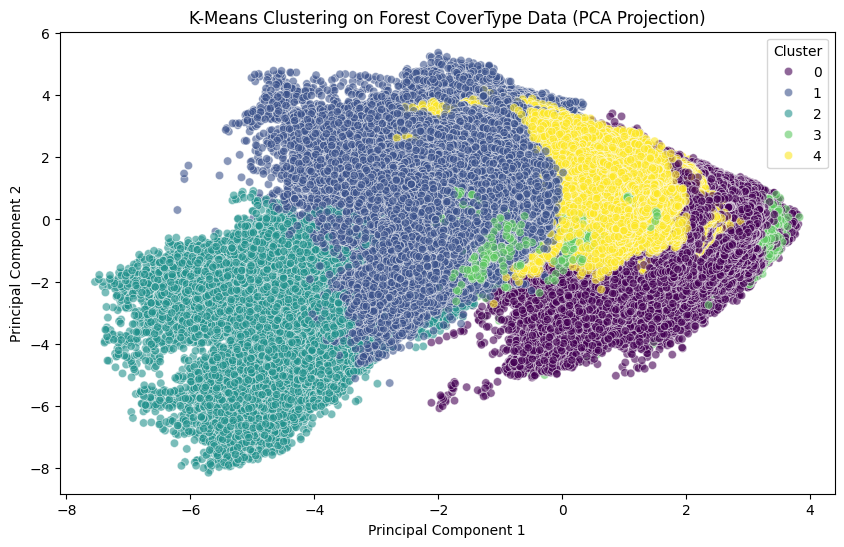

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# Step 1: Load the dataset
# (Assuming 'forest_cover.csv' is available locally)
forest = pd.read_csv('forest_cover.csv')

# Step 2: Data Inspection and Pre-processing
print(forest.info())
print(forest.describe())

# Select numeric columns for clustering (if necessary, adjust based on the dataset structure)
numeric_cols = forest.select_dtypes(include=[np.number]).columns
# Scale numeric variables to have mean=0 and std=1
scaler = StandardScaler()
forest_scaled = scaler.fit_transform(forest[numeric_cols])

# Step 3: Build the K-Means Clustering Model
# Set number of clusters (k=5 for demonstration; ideally, use the elbow method to decide k)
k = 5
kmeans = KMeans(n_clusters=k, n_init=25, random_state=123)
clusters = kmeans.fit_predict(forest_scaled)
forest['Cluster'] = clusters

# Print clustering results (cluster sizes and inertia)
print("Cluster sizes:\n", forest['Cluster'].value_counts())
print("Within-cluster sum of squares (Inertia):", kmeans.inertia_)

# Step 4: Visualize Clusters Using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(forest_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.6)
plt.title('K-Means Clustering on Forest CoverType Data (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## Example 2: Adult Dataset using Association Rule Mining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48843 non-null  object
 1   workclass       46044 non-null  object
 2   fnlwgt          48843 non-null  object
 3   education       48843 non-null  object
 4   education-num   48843 non-null  object
 5   marital-status  48843 non-null  object
 6   occupation      46034 non-null  object
 7   relationship    48843 non-null  object
 8   race            48843 non-null  object
 9   sex             48843 non-null  object
 10  capital-gain    48843 non-null  object
 11  capital-loss    48843 non-null  object
 12  hours-per-week  48843 non-null  object
 13  native-country  47986 non-null  object
 14  income          48843 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB
None
          age workclass  fnlwgt education education-num      marital-status  \
count   48843     

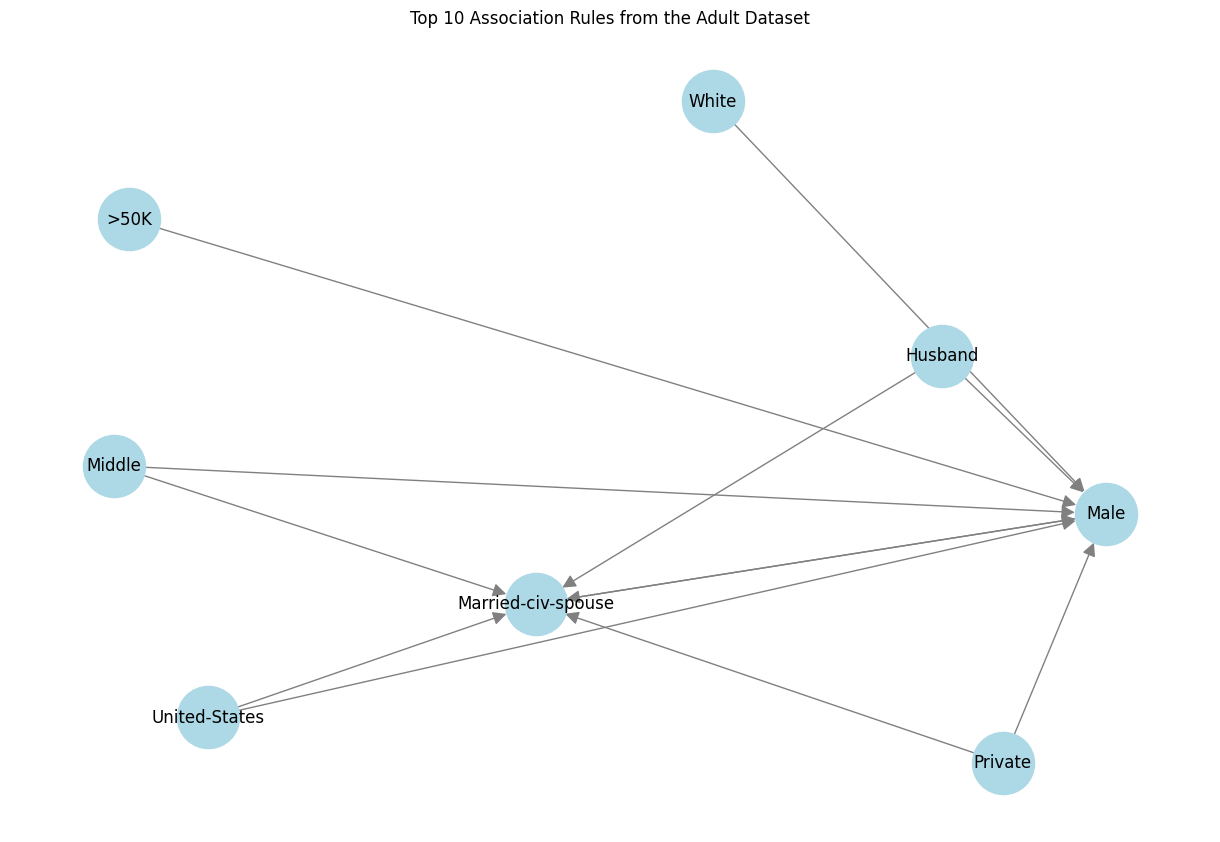

In [3]:
# Import necessary libraries for association rule mining
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Load the Adult dataset
adult = pd.read_csv('adult.csv', header=None, names=[
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
], na_values='?')

# Step 2: Data Inspection and Pre-processing
print(adult.info())
print(adult.describe(include='all'))

# Convert the 'age' column to numeric; non-convertible values will become NaN
adult['age'] = pd.to_numeric(adult['age'], errors='coerce')

# Optionally, check for any NaN values and handle them if necessary
print(adult['age'].isnull().sum())

# Now, discretize the 'age' column into categorical groups
adult['age_group'] = pd.cut(adult['age'], bins=[0, 25, 40, 60, 100], 
                            labels=['Young', 'Adult', 'Middle', 'Senior'])

# Drop the original 'age' column (and any other numeric columns not needed)
adult_trans_df = adult.drop(columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

# Convert each row into a list of transactions (string values)
transactions = adult_trans_df.astype(str).values.tolist()

# Use TransactionEncoder to transform the list of transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
adult_transactions = pd.DataFrame(te_array, columns=te.columns_)

# Step 3: Build the Association Rules Model
# Generate frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(adult_transactions, min_support=0.1, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets.head())

# Generate association rules based on the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("Association Rules:\n", rules.head())

# Step 4: Visualize the Top Association Rules
# For demonstration, select the top 10 rules by confidence
top_rules = rules.sort_values(by='confidence', ascending=False).head(10)

# Create a network graph to visualize the rules
G = nx.DiGraph()
for _, rule in top_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    for ant in antecedents:
        for cons in consequents:
            G.add_edge(ant, cons, weight=rule['confidence'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, arrowsize=20)
plt.title('Top 10 Association Rules from the Adult Dataset')
plt.show()

## Analysis of the Findings
### Clustering with K-Means (Forest CoverType Dataset):
- Quantitative Insights: The K-Means algorithm produces clusters with a certain within-cluster sum of squares (inertia). Analyzing cluster sizes helps determine if the chosen k is appropriate.
- Visual Insights: The PCA plot reveals the separation among clusters. Overlapping clusters may suggest the need for further data pre-processing or an alternative k value.
- Interpretation: A well-separated PCA plot indicates that the features used are effective in capturing the underlying structure of the data.

### Association Rule Mining (Adult Dataset):
- Quantitative Insights: The support and confidence metrics for the frequent itemsets and rules reveal which attribute combinations are most prevalent.
- Visual Insights: The network graph of the top rules provides a clear picture of how different attributes (e.g., age group, workclass, education) interact.
- Interpretation: The rules offer actionable insights (e.g., a specific education level might be strongly associated with higher income), which could inform policy or marketing strategies. Adjustments such as changing support and confidence thresholds can further refine the rules.